
# Aula 4: Exemplos de Estatística e Gráficos - Dados WHO

In [1]:
# Inicia ambiente Spark
import findspark
findspark.init()

In [2]:
# Carrega módulos 
# Carrega módulo PySpark para permitir ao Python acessar funções do Spark
from pyspark.sql import SparkSession

# Gambiarra
#from pyspark.conf import SparkConf


import time
start_time = time.time()

# Importa biblioteca Pandas para Análise de Dados
import pandas as pd

# Importa biblioteca Numpy para Tratamento de Matrizes
import numpy as np

# Importa biblioteca Matplotlib para desenhar gráficos 
import matplotlib.pyplot as plt

# Indica para mostrar os graficos inline no Notebook
%matplotlib inline

In [3]:
# Cria Sessão Spark
sparkSession = SparkSession.builder \
       .master("local") \
       .appName("Estatistica e Gráficos") \
       .getOrCreate()

# Carrega Arquivo de dados

In [4]:
%store -r path


# Le arquivo de dados CSV para Dataframe Spark
df = sparkSession.read.format("csv").options(sep=',',header='true',inferschema='true').load(path)

# A partir de agora trabalhanmos apenas com o dataframe 'df'

#Exibe campos da tabela e os tipos de dados
df.dtypes

[('Country', 'string'),
 ('Year', 'int'),
 ('Status', 'string'),
 ('Life expectancy', 'double'),
 ('Adult Mortality', 'int'),
 ('infant deaths', 'int'),
 ('Alcohol', 'double'),
 ('percentage expenditure', 'double'),
 ('Hepatitis B', 'int'),
 ('Measles', 'int'),
 ('BMI', 'double'),
 ('under-five deaths', 'int'),
 ('Polio', 'int'),
 ('Total expenditure', 'double'),
 ('Diphtheria', 'int'),
 ('HIV/AIDS', 'double'),
 ('GDP', 'double'),
 ('Population', 'double'),
 ('thinness 1-19 years', 'double'),
 ('thinness 5-9 years', 'double'),
 ('Income composition of resources', 'double'),
 ('Schooling', 'double')]

In [5]:
# Exibe primeiros 5 registros do Dataframe
df.show(5)

+-----------+----+----------+---------------+---------------+-------------+-------+----------------------+-----------+-------+----+-----------------+-----+-----------------+----------+--------+----------+-----------+-------------------+------------------+-------------------------------+---------+
|    Country|Year|    Status|Life expectancy|Adult Mortality|infant deaths|Alcohol|percentage expenditure|Hepatitis B|Measles| BMI|under-five deaths|Polio|Total expenditure|Diphtheria|HIV/AIDS|       GDP| Population|thinness 1-19 years|thinness 5-9 years|Income composition of resources|Schooling|
+-----------+----+----------+---------------+---------------+-------------+-------+----------------------+-----------+-------+----+-----------------+-----+-----------------+----------+--------+----------+-----------+-------------------+------------------+-------------------------------+---------+
|Afghanistan|2015|Developing|           65.0|            263|           62|   0.01|           71.27962362|

## Explicação do arquivo de dados Life_Expectancy_Data.csv

| Campo | Explicação do valor do campo |
|:-:|:-:|
|Country|Country |
|Year | Year |
|Status| Developed or Developing status |
|Life expectancy| Life Expectancy in age |
|Adult Mortality| Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population) |
|Infant deaths| Number of Infant Deaths per 1000 population |
|Alcohol| Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) |
|Percentage expenditure| Expenditure on health as a percentage of Gross Domestic Product per capita (%) |
|Hepatitis B| Hepatitis B (HepB) immunization coverage among 1-year-olds (%) |
|Measles| Measles - number of reported cases per 1000 population |
|BMI| Average Body Mass Index of entire population |
|under-five deaths| Number of under-five deaths per 1000 population |
|Polio| Polio (Pol3) immunization coverage among 1-year-olds (%) |
|Total expenditure| General government expenditure on health as a percentage of total government expenditure (%) |
|Diphtheria| Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%) |
|HIV/AIDS| Deaths per 1 000 live births HIV/AIDS (0-4 years) |
|GDP| Gross Domestic Product per capita (in USD) |
|Population| Population of the country |
|thinness 1-19 years| Prevalence of thinness among children and adolescents for Age 10 to 19 (%) |
|thinness 5-9 years| Prevalence of thinness among children for Age 5 to 9 (%) |
|Income composition of resources| Human Development Index in terms of income composition of resources (index ranging from 0 to 1) |
|Schooling| Number of years of Schooling (years) |

# Seleção de Dados e Geração de Gráfico

In [6]:
# Para gerar um gráfico precisamos extrair do dataframe os dados relevantes
# criamos um novo Dataframe gr apenas para gerar o gráfico
gr = df.select("Country","Year","Life expectancy").filter(df.Country == 'Brazil').drop("Country").sort("Year", ascending=True)

gr.show(10)

+----+---------------+
|Year|Life expectancy|
+----+---------------+
|2000|           75.0|
|2001|           71.0|
|2002|           71.4|
|2003|           71.8|
|2004|           72.0|
|2005|           72.7|
|2006|           73.0|
|2007|           73.3|
|2008|           73.4|
|2009|           73.6|
+----+---------------+
only showing top 10 rows



In [7]:
# Converte Dataframe em array Numpy, definindo o eixo x e eixo y
gr_x = np.array(gr.select('Year').collect())
gr_y = np.array(gr.select('Life expectancy').collect())

print(gr_x)
print(gr_y)

[[2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]]
[[75. ]
 [71. ]
 [71.4]
 [71.8]
 [72. ]
 [72.7]
 [73. ]
 [73.3]
 [73.4]
 [73.6]
 [73.8]
 [74.1]
 [74.5]
 [74.7]
 [74.8]
 [75. ]]


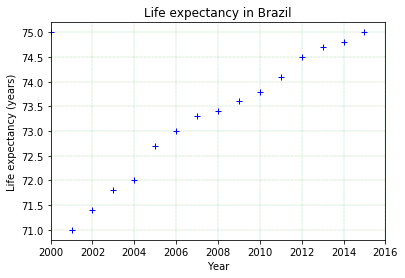

In [8]:
# Limpa gráfico anterior
plt.clf()

# Desenha gráfico com sinal + azul
plt.plot(gr_x,gr_y,'b+')

# Define nomes dos eixos
plt.xlabel('Year')
plt.ylabel('Life expectancy (years)')
plt.title(r'Life expectancy in Brazil')
plt.xlim(2000,2016)
plt.grid(color='g', linestyle=':', linewidth=.3)
plt.savefig('./life_expect_BR.png', dpi=300)
plt.show()

# Cálculo de estatística 

In [9]:
# Cria um novo Dataframe apenas com os dados relevantes (Pais, expetativa no ano de 2013)  
es = df.select("Country","Year","Life expectancy").filter(df.Year == '2013')
es.show(10)

+-------------------+----+---------------+
|            Country|Year|Life expectancy|
+-------------------+----+---------------+
|        Afghanistan|2013|           59.9|
|            Albania|2013|           77.2|
|            Algeria|2013|           75.3|
|             Angola|2013|           51.1|
|Antigua and Barbuda|2013|           76.1|
|          Argentina|2013|           76.0|
|            Armenia|2013|           74.4|
|          Australia|2013|           82.5|
|            Austria|2013|           81.1|
|         Azerbaijan|2013|           72.2|
+-------------------+----+---------------+
only showing top 10 rows



In [10]:
# Calculos estatisticos
summary = es.describe("Life expectancy")
summary.show()

+-------+-----------------+
|summary|  Life expectancy|
+-------+-----------------+
|  count|              183|
|   mean|71.23606557377052|
| stddev|8.413771405879869|
|    min|             49.9|
|    max|             87.0|
+-------+-----------------+



In [11]:
# Envia dados para o Panda
pandaDf = summary.toPandas()
min_string = pandaDf[pandaDf['summary'] == 'min']['Life expectancy'].iloc[0]
max_string = pandaDf[pandaDf['summary'] == 'max']['Life expectancy'].iloc[0]
mean_string = pandaDf[pandaDf['summary'] == 'mean']['Life expectancy'].iloc[0]
medianAndQuantiles = es.stat.approxQuantile("Life expectancy",[0.25,0.5,0.75],0.0)
(q1,median,q3) = (medianAndQuantiles[0], medianAndQuantiles[1], medianAndQuantiles[2])

<Figure size 432x288 with 0 Axes>

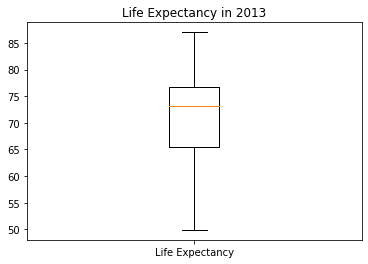

In [12]:
# Limpa gráfico anterior e inicia item
plt.clf() 
item = {}

item["label"] = 'Life Expectancy' 
item["mean"] = float(mean_string) 
item["med"] = median 
item["q1"] = q1
item["q3"] = q3
item["whislo"] = float(min_string) 
item["whishi"] = float(max_string)
item["fliers"] = []
stats = [item]

fig, axes = plt.subplots(1, 1)
axes.bxp(stats)
axes.set_title('Life Expectancy in 2013')

plt.savefig('./life_expect_stat_2013.png', dpi=300)
plt.show()

# Covariância e Correlação

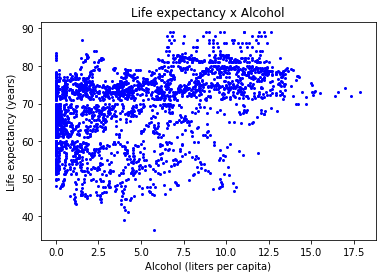

Covariance and Correlation Life expectancy x Alcohol
Covariance = 15.15
Correlation = 0.36


In [13]:
cov_df = df.select('Life expectancy', 'Alcohol')
#cov_df.show(10)

cov_x = np.array(cov_df.select('Alcohol').collect())
cov_y = np.array(cov_df.select('Life expectancy').collect())

# Limpa gráfico anterior
plt.clf()

# Desenha gráfico com sinal + azul
plt.plot(cov_x,cov_y,'bo',markersize=2)

# Define nomes dos eixos
plt.xlabel('Alcohol (liters per capita)')
plt.ylabel('Life expectancy (years)')
plt.title(r'Life expectancy x Alcohol')
plt.savefig('./life_expect_alcohol_cor.png', dpi=300)
plt.show()

print("Covariance and Correlation Life expectancy x Alcohol")
print("Covariance = %5.2f" % df.stat.cov('Life expectancy', 'Alcohol'))
print("Correlation = %1.2f" % df.stat.corr('Life expectancy', 'Alcohol'))

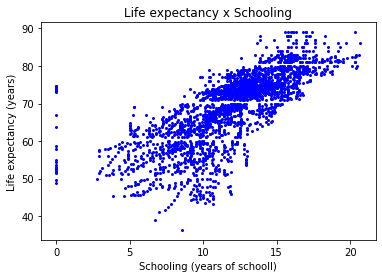

Covariance and Correlation Life expectancy x Schooling
Covariance = 24.74
Correlation = 0.56


In [14]:
cov_df = df.select('Life expectancy', 'Schooling')
#cov_df.show(10)

cov_x = np.array(cov_df.select('Schooling').collect())
cov_y = np.array(cov_df.select('Life expectancy').collect())

# Limpa gráfico anterior
plt.clf()

# Desenha gráfico com sinal + azul
plt.plot(cov_x,cov_y,'bo',markersize=2)

# Define nomes dos eixos
plt.xlabel('Schooling (years of schooll)')
plt.ylabel('Life expectancy (years)')
plt.title(r'Life expectancy x Schooling')
plt.savefig('./life_expect_schooling_cor.png', dpi=300)
plt.show()

print("Covariance and Correlation Life expectancy x Schooling")
print("Covariance = %5.2f" % df.stat.cov('Life expectancy', 'Schooling'))
print("Correlation = %1.2f" % df.stat.corr('Life expectancy', 'Schooling'))

In [15]:
sparkSession.stop()
print("--- Execution time: %s seconds ---" % (time.time() - start_time))

--- Execution time: 17.74536418914795 seconds ---
